In [ ]:
pip install --upgrade git+https://github.com/flairNLP/flair.git

In [ ]:
import os
import tweepy as tw
import pandas as pd
import re
from flair.models import TextClassifier
from flair.data import Sentence
import matplotlib.pyplot as plt

In [ ]:
#consumer_key, consumer_secret, access_token, access_token_secret are secret variables I keep in other place
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

search_words = "#COVID-19" + " -filter:retweets" 
date_since = "2020-03-01"

In [ ]:
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              tweet_mode='extended',
              since=date_since).items(1000)

In [ ]:
all_tweets = [tweet.full_text for tweet in tweets]
all_tweets[:5]

['GO TO TRUMP RALLY AND SIGN A DIFFERENT NAME ON WAVER. THE SUE WHEN YOU GET COVID 19.',
 '#Covid_19: Release the 111 call numbers related to Covid symptoms, that way at least the uk will know in advance how active the Virus is. It can take weeks for a 111 symptom call to show on the info the Gov releases at the moment. Even longer before hospital or death.',
 "Heritage Ministries Reports County's First Nursing Home Resident with COVID-19 | Chautauqua Today: https://t.co/kVjtmn9Eno",
 '"With God on your side".....\xa0those with “no religion” – based on responses in the 2011 Census – had the lowest rate of death involving Covid-19.... #atheism',
 '@ayo_dele @PmacMd @shooterdee May covid-19 see us and pass.😢']

In [ ]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['GO TO TRUMP RALLY AND SIGN A DIFFERENT NAME ON WAVER THE SUE WHEN YOU GET COVID 19',
 'Covid19 Release the 111 call numbers related to Covid symptoms that way at least the uk will know in advance how active the Virus is It can take weeks for a 111 symptom call to show on the info the Gov releases at the moment Even longer before hospital or death',
 'Heritage Ministries Reports Countys First Nursing Home Resident with COVID19 Chautauqua Today',
 'With God on your sidethose with no religion based on responses in the 2011 Census had the lowest rate of death involving Covid19 atheism',
 'ayodele PmacMd shooterdee May covid19 see us and pass']

In [ ]:
def label_to_number(labels):
  if labels[0].value == "POSITIVE":
    return labels[0].score
  else:
    return labels[0].score * -1

classifier = TextClassifier.load('en-sentiment')

def get_sentiment_value(txt):
  sent = Sentence(txt)
  classifier.predict(sent)
  return label_to_number(sent.labels)

2020-06-19 09:58:22,800 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert.pt not found in cache, downloading to /tmp/tmpg666wgxk


100%|██████████| 266170364/266170364 [00:27<00:00, 9659005.29B/s]

2020-06-19 09:58:50,736 copying /tmp/tmpg666wgxk to cache at /root/.flair/models/sentiment-en-mix-distillbert.pt


2020-06-19 09:58:51,282 removing temp file /tmp/tmpg666wgxk
2020-06-19 09:58:51,315 loading file /root/.flair/models/sentiment-en-mix-distillbert.pt


In [ ]:
sentiment_values = [[get_sentiment_value(tweet), tweet] for tweet in all_tweets_no_urls]
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

In [ ]:
sentiment_df[sentiment_df['polarity'] > 0]

,polarity,tweet
2,0.995630,Heritage Ministries Reports Countys First Nurs...
4,0.888230,ayodele PmacMd shooterdee May covid19 see us a...
6,0.972908,To help those who have supported the country d...
7,0.926726,How Well Do Americans Know the Facts AboutCOVID19
8,0.994507,Gaborone hub has joined the Young Global Leade...
...,...,...
990,0.727367,ProjectLincoln GovRonDeSantis So that means de...
991,0.996716,CornPop62380277 FunPatroll doctorcherokee ther...
993,0.854588,Happening Now IOM UNmigration is organizing tr...
997,0.831440,Decolonize everything NOW Is COVID19 magnifyin...


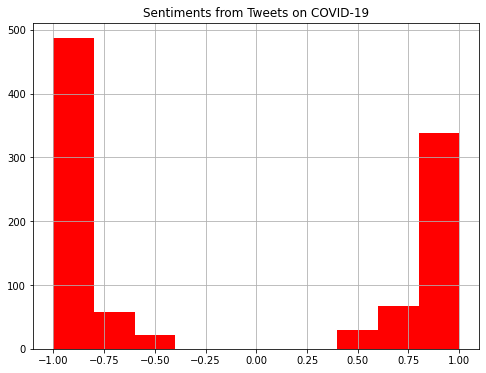

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

sentiment_df.hist(
             ax=ax,
             color="red")

plt.title("Sentiments from Tweets on COVID-19")
plt.show()

In [ ]:
pd.set_option('max_colwidth', None)
sentiment_df.sort_values(by=['polarity']).tail(10)

## Tweets analysis divided on positive and negative sentiment

***Positive sentiment tweets***

In [ ]:
positive = sentiment_df.sort_values(by=['polarity']).tail(100)
sent_pos = positive['tweet']
sent_uniq_pos = []
for sent in sent_pos:
  if sent not in sent_uniq_pos:
    sent_uniq_pos.append(sent)
text_pos = " ".join(sent_uniq_pos)
text_pos = text_pos.lower()

pd.set_option('display.max_colwidth',1000)
sent_pos.tail(30)

271                                                                                                                                                                                                          COVID19 Oyo State Records Highest SingleDay Increase of 103 NewCases
773                                       We are really pleased to have funded this lovely nightwear from our COVID19 Fundraising for the Patients at NGHnhstrust who cant have any visitors at this timeThese have been very speedily distributed by the Patient Experience Team
174                                                                                                                                                                                                   rhondaharbison thehill Its startling how much this resembles the covid19 ce
65                                                                                                                                                                                

* **Most common words**



In [ ]:
from nltk.tokenize import RegexpTokenizer
from collections import Counter
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
tokens = tokenizer.tokenize(text_pos)
Counter(tokens).most_common(50)

[('the', 123),
 ('covid19', 86),
 ('and', 75),
 ('to', 67),
 ('of', 66),
 ('in', 45),
 ('a', 36),
 ('for', 35),
 ('on', 23),
 ('from', 21),
 ('is', 19),
 ('at', 17),
 ('we', 16),
 ('have', 16),
 ('as', 15),
 ('this', 14),
 ('our', 14),
 ('amp', 12),
 ('with', 12),
 ('how', 12),
 ('by', 11),
 ('i', 11),
 ('will', 10),
 ('be', 10),
 ('can', 10),
 ('are', 9),
 ('that', 9),
 ('during', 9),
 ('impact', 9),
 ('has', 8),
 ('their', 8),
 ('you', 7),
 ('pandemic', 7),
 ('social', 6),
 ('some', 6),
 ('out', 6),
 ('world', 6),
 ('global', 6),
 ('people', 6),
 ('covid', 6),
 ('19', 6),
 ('my', 6),
 ('it', 6),
 ('an', 6),
 ('uk', 6),
 ('via', 6),
 ('level', 5),
 ('way', 5),
 ('health', 5),
 ('more', 5)]

* **Context of chosen words**

In [ ]:
import re
items = []
for ii,item in enumerate(re.finditer(r"( you )",text_pos)):
  items.append((item.group(), text_pos[item.start()-100:item.end()+200]))
items

[(' you ',
  'at jalgaon also treatment of covid 19 has done and the patient recovered within 73 hrs remember when you were coronavirus disease 2019 covid19 you shone like the sun climateducate projectenvironmental issues in the context of covid19 crisis in bangladeshmr raguib uddin ahmedenvironmental scientist adviso'),
 (' you ',
  'done and the patient recovered within 73 hrs remember when you were coronavirus disease 2019 covid19 you shone like the sun climateducate projectenvironmental issues in the context of covid19 crisis in bangladeshmr raguib uddin ahmedenvironmental scientist advisorloven bangladeshcovid19 consequences in b'),
 (' you ',
  'oad of sitio balintulay brgy kahupian sogod southern leyteteampnppnpkakampimoweserveandprotect thank you wef for highlighting one of the measures we carried on during these previous months to fight the covid19 and protect our professionals along the way investintheplanet fantastic soldout webinar with he'),
 (' you ',
  'stin et al the du

***Negative sentiment tweets***

In [ ]:
negative = sentiment_df.sort_values(by=['polarity']).head(100)
sent_neg = negative['tweet']
sent_uniq_neg = []
for sent in sent_neg:
  if sent not in sent_uniq_neg:
    sent_uniq_neg.append(sent)
text_neg = " ".join(sent_neg)
text_neg = text_neg.lower()
#sent_neg.tail(30)


* **Most common words**


In [ ]:
from nltk.tokenize import RegexpTokenizer
from collections import Counter
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
tokens = tokenizer.tokenize(text_neg)
Counter(tokens).most_common(50)

[('the', 102),
 ('to', 98),
 ('covid19', 84),
 ('is', 48),
 ('of', 45),
 ('a', 44),
 ('in', 44),
 ('that', 37),
 ('and', 33),
 ('for', 29),
 ('from', 25),
 ('as', 21),
 ('we', 21),
 ('i', 19),
 ('have', 19),
 ('covid', 18),
 ('on', 18),
 ('are', 18),
 ('it', 17),
 ('be', 16),
 ('not', 16),
 ('if', 15),
 ('they', 15),
 ('19', 15),
 ('so', 15),
 ('this', 14),
 ('with', 14),
 ('amp', 14),
 ('level', 13),
 ('people', 13),
 ('no', 12),
 ('just', 12),
 ('has', 12),
 ('can', 12),
 ('you', 12),
 ('unpaid', 12),
 ('3', 11),
 ('or', 11),
 ('at', 11),
 ('coronavirus', 11),
 ('were', 10),
 ('up', 10),
 ('many', 10),
 ('its', 9),
 ('my', 9),
 ('virus', 9),
 ('their', 9),
 ('test', 8),
 ('by', 8),
 ('but', 8)]

* **Context of chosen words**

In [ ]:
import re
items = []
for ii,item in enumerate(re.finditer(r"( realdonaldtrump )",text_neg)):
  items.append((item.group(), text_neg[item.start()-140:item.end()+140]))
items

[(' realdonaldtrump ',
  'us how a false rumour led to hate online anyone who believes covid19 created by uk laboratory using gates money has to be as stupid as potus realdonaldtrump wooo virus level 3 general circulation covid19 is basically now exactly like the dailymail its in circulation and toxic to anyone who dares '),
 (' realdonaldtrump ',
  'k to home church or workplace anyone else who catches covid19 from that person should hold accountable the campaign of president coronavirus realdonaldtrump potus is holding an indoor rally during a public health crisis skynews obviously covid19 is racist the covid19 pandemic is compounding the i')]